## Project Requirements
Perform a statistical analysis project:
- First, generate a synthetic dataset with at least two distinct groups with different means or distributions using numpy and pandas.
- Then, calculate and display descriptive statistics for the entire dataset and each group.
- Next, visualize data distributions for each group using histograms or box plots.
- After that, formulate and conduct a hypothesis test to compare the groups, displaying the results and p-value.
- Finally, summarize the entire project, including data properties, statistics, visual insights, and conclusions from the hypothesis test, providing a comprehensive overview of the analysis and key findings.

## Generate Synthetic Dataset

Create a synthetic dataset with at least two distinct groups, ensuring they have different means or distributions to make statistical comparisons interesting.

In [1]:
import numpy as np
import pandas as pd

print("Libraries imported: numpy as np, pandas as pd")

Libraries imported: numpy as np, pandas as pd


In [2]:
np.random.seed(42) # for reproducibility

# Generate data for Group A
data_a = np.random.normal(loc=50, scale=10, size=100)

# Generate data for Group B with different mean and scale
data_b = np.random.normal(loc=65, scale=12, size=100)

# Combine data and create group labels
data = np.concatenate((data_a, data_b))
groups = ['A'] * len(data_a) + ['B'] * len(data_b)

# Create a pandas DataFrame
df = pd.DataFrame({
    'Value': data,
    'Group': groups
})

print("Synthetic dataset created successfully. Displaying the first few rows:")
print(df.head())

Synthetic dataset created successfully. Displaying the first few rows:
       Value Group
0  54.967142     A
1  48.617357     A
2  56.476885     A
3  65.230299     A
4  47.658466     A


## Explore Descriptive Statistics

Calculate and display descriptive statistics for the entire dataset and for each generated group to understand their basic characteristics.


In [3]:
print("Descriptive statistics for the entire dataset:")
print(df['Value'].describe())
print("\nDescriptive statistics for Group A:")
print(df[df['Group'] == 'A']['Value'].describe())
print("\nDescriptive statistics for Group B:")
print(df[df['Group'] == 'B']['Value'].describe())

Descriptive statistics for the entire dataset:
count    200.000000
mean      57.114595
std       13.152624
min       23.802549
25%       47.721335
50%       55.142243
75%       66.358038
max       97.642030
Name: Value, dtype: float64

Descriptive statistics for Group A:
count    100.000000
mean      48.961535
std        9.081684
min       23.802549
25%       43.990943
50%       48.730437
75%       54.059521
max       68.522782
Name: Value, dtype: float64

Descriptive statistics for Group B:
count    100.000000
mean      65.267655
std       11.444028
min       41.974745
25%       55.332074
50%       66.009286
75%       71.458045
max       97.642030
Name: Value, dtype: float64


## Visualize Data Distributions

Generate visualizations such as histograms or box plots for each group to visually compare their distributions and highlight differences.


Libraries imported: matplotlib.pyplot as plt, seaborn as sns


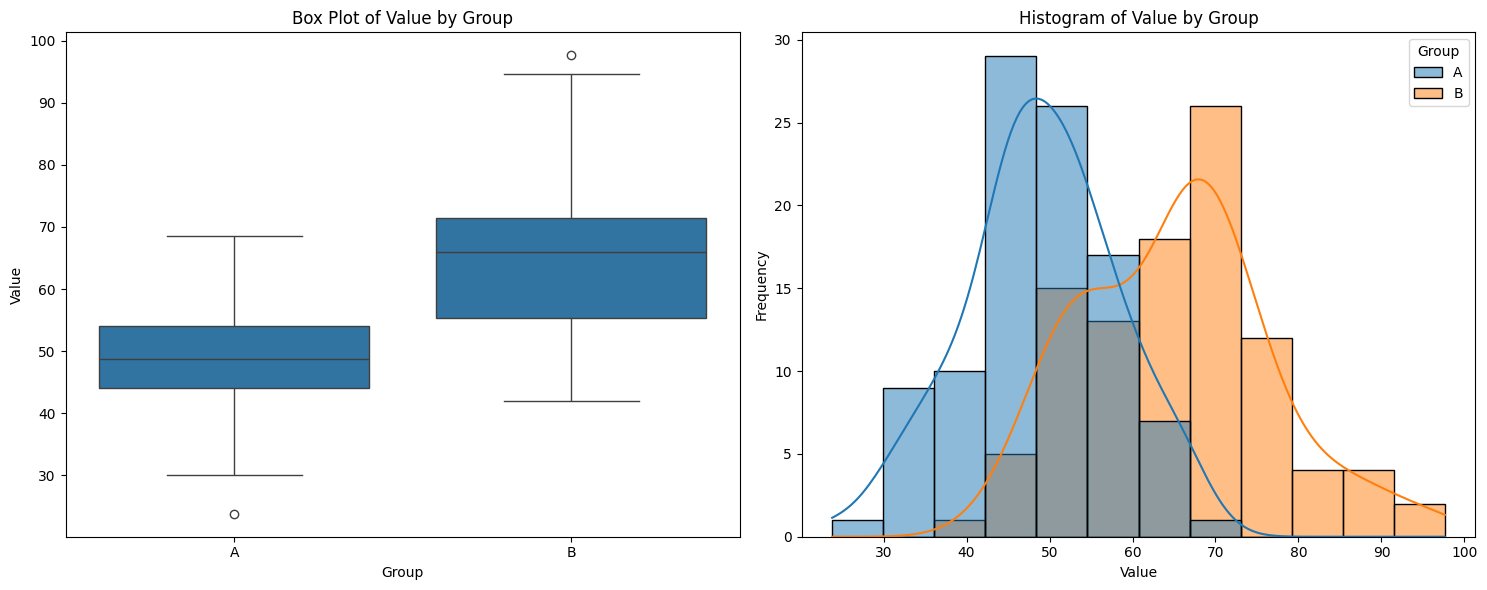

Box plot and histogram visualizations generated successfully.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported: matplotlib.pyplot as plt, seaborn as sns")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot
sns.boxplot(x='Group', y='Value', data=df, ax=axes[0])
axes[0].set_title('Box Plot of Value by Group')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Value')

# Histogram
sns.histplot(x='Value', hue='Group', data=df, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Value by Group')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
# The legend is automatically handled by seaborn.histplot when 'hue' is used.
# Explicitly calling axes[1].legend() is redundant and caused the UserWarning.

plt.tight_layout()
plt.show()
print("Box plot and histogram visualizations generated successfully.")

## Conduct Hypothesis Testing

Formulate a statistical hypothesis based on the generated groups and perform an appropriate statistical test. Display the test results and p-value.


In [6]:
from scipy.stats import ttest_ind

# Separate the 'Value' column into two distinct series for Group A and Group B
group_a_values = df[df['Group'] == 'A']['Value']
group_b_values = df[df['Group'] == 'B']['Value']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group_a_values, group_b_values)

# Display the test results
print("Independent Samples t-test results:")
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference between the means of Group A and Group B.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference between the means of Group A and Group B.")

Independent Samples t-test results:
Test Statistic (t): -11.1612
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference between the means of Group A and Group B.


### Data Analysis Key Findings

*   **Synthetic Dataset Generation:** A dataset of 200 observations was created with two distinct groups: 'Group A' (100 samples, normal distribution with mean 50, standard deviation 10) and 'Group B' (100 samples, normal distribution with mean 65, standard deviation 12).
*   **Descriptive Statistics:**
    *   The entire dataset had an overall mean of approximately 57.11 and a standard deviation of 13.15.
    *   'Group A' showed a mean of about 48.96 and a standard deviation of 9.08.
    *   'Group B' showed a notably higher mean of about 65.27 and a standard deviation of 11.44, indicating a clear difference in central tendency between the groups.
*   **Visual Distributions:** Box plots and histograms visually confirmed the distinct distributions, with 'Group B' showing a higher median and overall range compared to 'Group A'. The histogram displayed two separate peaks, reinforcing that 'Group B' values were shifted significantly higher than 'Group A' values.
*   **Hypothesis Testing:** An independent samples t-test was performed to compare the means of 'Group A' and 'Group B'.
    *   The test yielded a t-statistic of approximately -11.1612.
    *   The p-value was 0.0000.
    *   Given a significance level ($\alpha$) of 0.05, the p-value being less than $\alpha$ led to the rejection of the null hypothesis.
    *   This statistically confirms a significant difference between the means of 'Group A' and 'Group B'.